<a href="https://colab.research.google.com/github/hkabbay/keras-practice/blob/main/IMDB_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from keras.datasets import imdb
# num_words=10000 to keep the top 10000 most frequently occuring words
# rare words will be discarded
(train_data, train_labels), (test_data, test_labels) = \
        imdb.load_data(num_words=10000)

In [3]:
# Preview data from training set 
# train_data is a list of word indices, train_labels (target) are binary 0(negative) or 1(positive).
train_data, train_labels

(array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
        list([1, 194, 1153, 194, 8255, 78, 22

In [4]:
# Preview data from test set
test_data, test_labels

(array([list([1, 591, 202, 14, 31, 6, 717, 10, 10, 2, 2, 5, 4, 360, 7, 4, 177, 5760, 394, 354, 4, 123, 9, 1035, 1035, 1035, 10, 10, 13, 92, 124, 89, 488, 7944, 100, 28, 1668, 14, 31, 23, 27, 7479, 29, 220, 468, 8, 124, 14, 286, 170, 8, 157, 46, 5, 27, 239, 16, 179, 2, 38, 32, 25, 7944, 451, 202, 14, 6, 717]),
        list([1, 14, 22, 3443, 6, 176, 7, 5063, 88, 12, 2679, 23, 1310, 5, 109, 943, 4, 114, 9, 55, 606, 5, 111, 7, 4, 139, 193, 273, 23, 4, 172, 270, 11, 7216, 2, 4, 8463, 2801, 109, 1603, 21, 4, 22, 3861, 8, 6, 1193, 1330, 10, 10, 4, 105, 987, 35, 841, 2, 19, 861, 1074, 5, 1987, 2, 45, 55, 221, 15, 670, 5304, 526, 14, 1069, 4, 405, 5, 2438, 7, 27, 85, 108, 131, 4, 5045, 5304, 3884, 405, 9, 3523, 133, 5, 50, 13, 104, 51, 66, 166, 14, 22, 157, 9, 4, 530, 239, 34, 8463, 2801, 45, 407, 31, 7, 41, 3778, 105, 21, 59, 299, 12, 38, 950, 5, 4521, 15, 45, 629, 488, 2733, 127, 6, 52, 292, 17, 4, 6936, 185, 132, 1988, 5304, 1799, 488, 2693, 47, 6, 392, 173, 4, 2, 4378, 270, 2352, 4, 1500, 7

In [5]:
# Check max index number in the train_data
max([max(sequence) for sequence in train_data])

9999

In [6]:
# How to decode a review back to english
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()]
)
# Sample from reverse_word_index
list(reverse_word_index.items())[:4]

[(34701, 'fawn'), (52006, 'tsukino'), (52007, 'nunnery'), (16816, 'sonja')]

In [7]:
# Decode review for train_data[0]
# import numpy as np
# print(np.array(train_data[0]).transpose())
# print(reverse_word_index[19])
# indices are offset by 3 because 0, 1, and 2 are reserved indices for “padding,” “start of sequence,” and “unknown.” 
decoded_review = ' '.join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]]
)
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [8]:
# Encode lists of integers into vectors 10,000 dimensional vectors
import numpy as np
def vectorize_sequences1(sequences, dimension=10):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1
  return results
vectorize_sequences1(np.array(list([1,3,2,8])))
# Below is an example how value for each index will be flagged 1 in the binary vector

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]])

In [9]:
# Convert train and test data into vectors
def vectorize_sequences(sequences, dimension=10000):
  # Creates all-zero matrix of shape [len(sequence), dimensions]
  results = np.zeros((len(sequences), dimension))
  # Set specific indices to value 1
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1
  return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
# Sample from x_train
print(x_train[0])
x_train.shape

[0. 1. 1. ... 0. 0. 0.]


(25000, 10000)

In [10]:
# test code
sample = [2,4,6,2,7]
results = (np.zeros((len(sample), 10)))
print(results)
for i, seq in enumerate(sample):
  # print(i, seq)
  results[i, seq] = 1
print(results)
results.shape

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


(5, 10)

In [11]:
# Vectorize labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')
type(y_train[0]), type(train_labels[0])

(numpy.float32, numpy.int64)

In [12]:
# Building the model
# Input data is vector, and labels are scalar
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# Add loss function, optimizer and metrics
model.compile(optimizer = 'rmsprop', loss='binary_crossentropy', metrics=['accuracy'])


In [44]:
# Create validation set
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
# partial_x_train.shape
y_val = y_train[:10000]
partial_y_train = y_train[10000:]
partial_y_train.shape

(15000,)

In [45]:
# Train the model for 20 epocs and save history
history = model.fit(partial_x_train, partial_y_train, epochs=20,
                    batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 30ms/step - loss: 0.5010 - accuracy: 0.7849 - val_loss: 0.3824 - val_accuracy: 0.8626
Epoch 2/20
30/30 [==============================] - 0s 15ms/step - loss: 0.2938 - accuracy: 0.9037 - val_loss: 0.3077 - val_accuracy: 0.8829
Epoch 3/20
30/30 [==============================] - 0s 14ms/step - loss: 0.2145 - accuracy: 0.9322 - val_loss: 0.2759 - val_accuracy: 0.8899
Epoch 4/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1698 - accuracy: 0.9440 - val_loss: 0.2750 - val_accuracy: 0.8909
Epoch 5/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1383 - accuracy: 0.9573 - val_loss: 0.3020 - val_accuracy: 0.8810
Epoch 6/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1109 - accuracy: 0.9671 - val_loss: 0.2967 - val_accuracy: 0.8874
Epoch 7/20
30/30 [==============================] - 0s 14ms/step - loss: 0.0910 - accuracy: 0.9726 - val_loss: 0.3500 - val_accuracy: 0.8704
Epoch 8/20
30

In [53]:
# Convert history into a dict for convenience in plotting
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

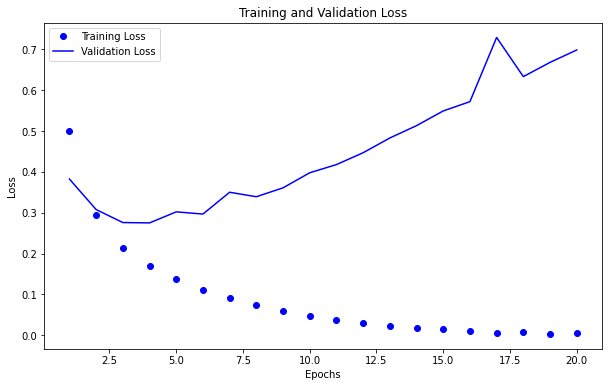

In [69]:
# Plot findings from the model run
from matplotlib import pyplot as plt
epochs = range(1, len(history_dict['accuracy']) + 1)
plt.figure(figsize=(10,6))
plt.plot(epochs, history_dict['loss'], 'bo', label='Training Loss')
plt.plot(epochs, history_dict['val_loss'], 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

<Figure size 432x288 with 0 Axes>

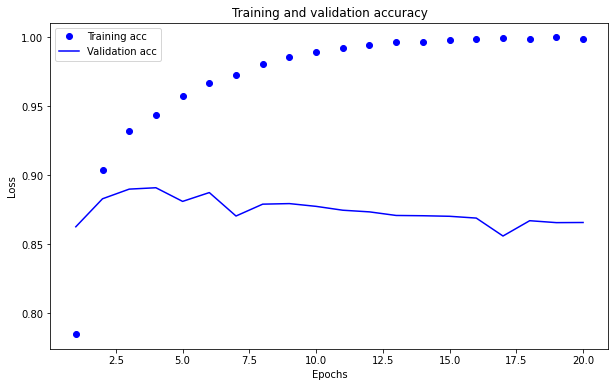

In [70]:
# Plot accuracy
plt.clf()
plt.figure(figsize=(10,6))
plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training acc')
plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [71]:
# Retrain model with 4 epochs
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 10ms/step - loss: 0.4692 - accuracy: 0.8110
Epoch 2/4
49/49 [==============================] - 0s 9ms/step - loss: 0.2669 - accuracy: 0.9055
Epoch 3/4
49/49 [==============================] - 0s 9ms/step - loss: 0.2029 - accuracy: 0.9281
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.2993 - accuracy: 0.8825


In [74]:
# Loss function and accuracy
results

[0.2993096113204956, 0.8824800252914429]

In [75]:
# Predicting values
model.predict(x_test)

array([[0.24421713],
       [0.9999697 ],
       [0.97236055],
       ...,
       [0.1470321 ],
       [0.09802075],
       [0.75862795]], dtype=float32)

In [77]:
# New model with another hidden layer
model_1 = models.Sequential()
model_1.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model_1.add(layers.Dense(16, activation='relu'))
model_1.add(layers.Dense(16, activation='relu'))
model_1.add(layers.Dense(1, activation='sigmoid'))
model_1.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])
model_1.fit(x_train, y_train, epochs=5, batch_size=512)
model_1.evaluate(x_test, y_test)
# Accuracy decreased to 85% changing epocs to 5 - not much change

Epoch 1/5
49/49 [==============================] - 1s 9ms/step - loss: 0.4573 - accuracy: 0.8128
Epoch 2/5
49/49 [==============================] - 0s 9ms/step - loss: 0.2511 - accuracy: 0.9086
Epoch 3/5
49/49 [==============================] - 0s 9ms/step - loss: 0.1940 - accuracy: 0.9295
Epoch 4/5
49/49 [==============================] - 0s 9ms/step - loss: 0.1617 - accuracy: 0.9419
Epoch 5/5
782/782 [==============================] - 2s 2ms/step - loss: 0.3818 - accuracy: 0.8601


[0.3818143308162689, 0.8600800037384033]

In [21]:
# New model with only one hidden layer
model_2 = models.Sequential()
model_2.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model_2.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model_2.add(layers.Dense(1, activation='sigmoid'))
model_2.compile(optimizer='rmsprop',
loss='mse',
metrics=['accuracy'])
model_2.fit(x_train, y_train, epochs=8, batch_size=512)
model_2.evaluate(x_test, y_test)

Epoch 1/8
49/49 [==============================] - 1s 9ms/step - loss: 0.1337 - accuracy: 0.8252
Epoch 2/8
49/49 [==============================] - 0s 9ms/step - loss: 0.0679 - accuracy: 0.9151
Epoch 3/8
49/49 [==============================] - 0s 8ms/step - loss: 0.0515 - accuracy: 0.9341
Epoch 4/8
49/49 [==============================] - 0s 8ms/step - loss: 0.0421 - accuracy: 0.9468
Epoch 5/8
49/49 [==============================] - 0s 9ms/step - loss: 0.0357 - accuracy: 0.9570
Epoch 6/8
49/49 [==============================] - 0s 8ms/step - loss: 0.0314 - accuracy: 0.9619
Epoch 7/8
49/49 [==============================] - 0s 8ms/step - loss: 0.0283 - accuracy: 0.9668
Epoch 8/8
782/782 [==============================] - 2s 2ms/step - loss: 0.1117 - accuracy: 0.8666


[0.1116599291563034, 0.866599977016449]